In [ ]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

**This is the first part of the module 6 assignment. The full module 6 assignment will be due on Friday, April 22 at 11:59 pm ET.  To submit your work, please download this document as an html file and upload that to Canvas.** 

**In this assignment, you'll code the 2D Ising model and explore the system behavior as a function of parameters**

**0. List the names of your group members, as well as any other class members you conferred with for this assignment.**

Noah Schapera, Minxuan Liu, Windy Wang, Christina Trifonova 

$\sum_{hell} + \frac{hello}{hello} $ 




**1. Write a function that simulates the 2D Ising model on a square lattice and uses periodic boundary conditions. Rather than ```if``` statements, use the built-in modulus function to deal with periodic boundary conditions. Your function should have inputs for the parameters listed below, and it should use the Metropolis algorithm to update spin values. Your code should output the 2D spin configuration for each time step and the average magnetization per spin as a function of time.**

$N = $ number of spins

$J = $ the coupling/interaction strength

$h = $ the external field strength

$T = $ temperature

$t = $ number of iterations

In [1]:
import numpy as np
import numpy.random as nprnd
import matplotlib.pyplot as plt
from numpy.lib.shape_base import take_along_axis

In [ ]:

def Ising2D(N,J,T,h,t):
  # N = # of spins
  # J = coupling strength
  # T = temperature
  # t = number of iterations
  # h = external magnetic field, list with len()=2, index 0 is mag, index 1 is direction  

  # initialize our spins at t = 0
  spinAngles = nprnd.randint(2, size=(N,N))
  spinAngles[spinAngles==0]=-1
  mat = np.zeros([N,N,t])
  avMag=np.zeros(t)

  for iter in range(t):
    #print('nextIter')
    for k in range(N):
      for l in range(N):
        # pick a spin at random
        i = nprnd.randint(0,N)
        j = nprnd.randint(0,N)

        #Periodic boundary condition in i
        low_i=(i-1)%N
        high_i=(i+1)%N


        #Periodic bounary conditions in j
        low_j=(j-1)%N
        high_j=(j+1)%N

        # calculate energy of the current state
        currentSpinAngle = spinAngles[i,j]

        # neighboring spins
        leftSpinAngle = spinAngles[low_i,j]
        rightSpinAngle = spinAngles[high_i,j]
        upSpinAngle = spinAngles[i,low_j]
        downSpinAngle = spinAngles[i,high_j]

        Eij = -J*currentSpinAngle*(leftSpinAngle+rightSpinAngle+upSpinAngle+downSpinAngle)-h*currentSpinAngle
        
        # calculate the energy of the proposed flipped state
        proposedNewAngle = currentSpinAngle*(-1)
        Eij_flip = -J*proposedNewAngle*(leftSpinAngle+rightSpinAngle+upSpinAngle+downSpinAngle)-h*proposedNewAngle
        
        # calculate the energy difference
        deltaE = Eij_flip - Eij

        # decide whether to flip the spin
        if deltaE <0:
          spinAngles[i,j] = proposedNewAngle
        else:
          prob = np.exp(-deltaE/T)
          rn = nprnd.rand(1)
          if rn < prob:
            spinAngles[i,j] = proposedNewAngle

    mx=0
    my=0
    mRun=0
    m=0
    for i in range(N):
      for j in range(N):
        mRun+=spinAngles[i,j]/(N**2)
    m=np.sqrt(mRun**2)
    avMag[iter]=m
    mat[:,:,iter] = spinAngles
  return mat, avMag





**(a) Run your code using the parameter sets listed below, saving the outputs from each.**

$N = 50$ 

$J = 1$

$h = 0$

$T = 0.001$

$t = 500$

**and**

$N = 50$ 

$J = 1$

$h = 0$

$T = 1000$

$t = 500$

**Plot the average magnetizations per spin for each simulation on the same axes and include a legend and axis labels. Using the colab notebook from class this week, create animations (using every 5th frame) for each system. Describe the observed behaviors, and how they correspond to features in the plots.**

In [ ]:
mat1,avMag1=Ising2D(50,1,0.001,0,500)
mat2,avMag2=Ising2D(50,1,1000,0,500)

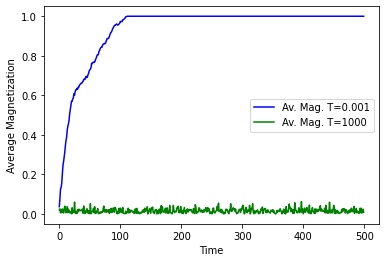

In [ ]:
t=500
t=np.arange(0,t,1)
fig,ax=plt.subplots(1,1)
plt.plot(t,avMag1,color='blue',label='Av. Mag. T=0.001')
plt.plot(t,avMag2,color='green', label='Av. Mag. T=1000')
ax.set(xlabel='Time',ylabel='Average Magnetization')
ax.legend()
plt.show()


In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
# look at vector field
N=50
t=500
x = np.arange(0,N)
y = np.arange(0,N)

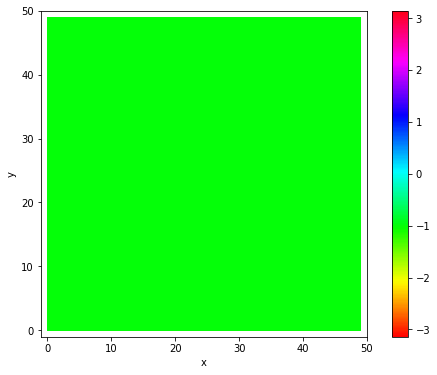

In [ ]:
# visualize by looking at angles
vf0 = mat1[:,:,t-1]
fig,ax = plt.subplots(figsize=(9,6))
ang = ax.pcolormesh(x,y,vf0,cmap='hsv',vmin=-np.pi,vmax=np.pi)
ax.axis('square')

ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')

plt.colorbar(ang) # if the figure is named, that needs to be the input here 
plt.show()

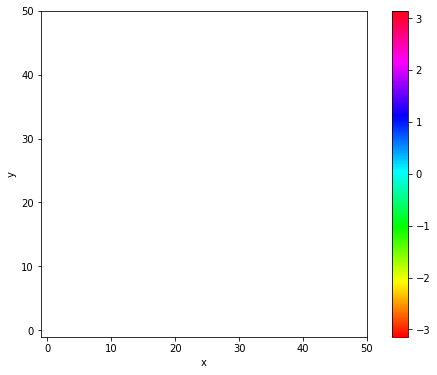

In [ ]:
# animation of angles

fig,ax = plt.subplots(figsize=(9,6))
ax.axis('square') # this needs to come before ax.set, otherwise this will change axes from set limits
ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')

ims = []
for i in range(0,t,5):
  angs = mat1[:,:,i]
  im = ax.pcolormesh(x,y,angs,cmap='hsv',vmin=-np.pi,vmax=np.pi,animated=True)
  if i == 0:
    plt.colorbar(ang)
  ims.append([im])

ang_anim = animation.ArtistAnimation(fig,ims,interval=50,repeat_delay=1000) 
HTML(ang_anim.to_jshtml())

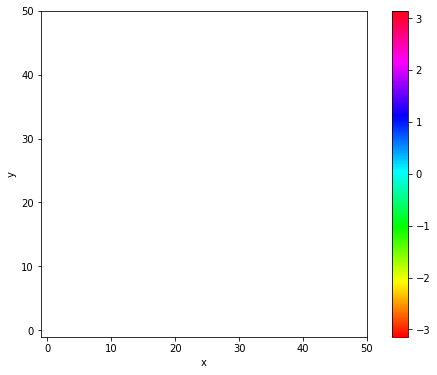

In [ ]:
# animation of angles

fig,ax = plt.subplots(figsize=(9,6))
ax.axis('square') # this needs to come before ax.set, otherwise this will change axes from set limits
ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')

ims = []
for i in range(0,t,5):
  angs = mat2[:,:,i]
  im = ax.pcolormesh(x,y,angs,cmap='hsv',vmin=-np.pi,vmax=np.pi,animated=True)
  if i == 0:
    plt.colorbar(ang)
  ims.append([im])

ang_anim = animation.ArtistAnimation(fig,ims,interval=50,repeat_delay=1000) 
HTML(ang_anim.to_jshtml())

In the low temperature system, we observe that the average magnetization increases with time until finally reaching a plateau. This corresponds to an increased magnetic domain size in the animation, until the system finally settles in an arragnement with a single dominant magnetic domain. 

Meanwhile we observe a chaotic average magnetization with no clear positive or negative trend with respect to time in the high temperature system. The magnetic domains of this animation are incredibly small (typically only a single pixel) and do not seem to grow over time. 

**(b)  It turns out that repeated function calls within ```for``` loops can really affect the efficiency of code. In particular, for this code, repeated calls of the ```randint``` function to choose a random spin  will cause your code to run slower. Make your code faster by modifying the random index generation to outside the for loops.  Similarly, you can further improve your code's performance by moving the modulus function calls outside the ```for``` loops.**

In [ ]:

def Ising2DOptimized(N,J,T,h,t):
  # N = # of spins
  # J = coupling strength
  # T = temperature
  # t = number of iterations
  # h = external magnetic field, list with len()=2, index 0 is mag, index 1 is direction  

  # initialize our spins at t = 0

  spinAngles = nprnd.randint(2, size=(N,N))
  spinAngles[spinAngles==0]=-1
  mat = np.zeros([N,N,t])
  avMag=np.zeros(t)
  
  
  randsi=nprnd.randint(0,N,size=(N,N,t))
  randsj=nprnd.randint(0,N,size=(N,N,t))

  #newRandAngle=2*np.pi*(nprnd.rand(N,N,t)-0.5)

  randomChoice=nprnd.rand(N,N,t)

  low_is=(randsi-1)%N
  high_is=(randsi+1)%N

  low_js=(randsj-1)%N
  high_js=(randsj+1)%N


  #print('Generated Angles')

  for iter in range(t):
    for k in range(N):
      for l in range(N):
        # pick a spin at random
        i = randsi[k,l,iter]
        j = randsj[k,l,iter]

        #Periodic boundary condition in i
        low_i=low_is[k,l,iter]
        high_i=high_is[k,l,iter]


        #Periodic bounary conditions in j
        low_j=low_js[k,l,iter]
        high_j=high_js[k,l,iter]

        # calculate energy of the current state
        currentSpinAngle = spinAngles[i,j]

        # neighboring spins
        leftSpinAngle = spinAngles[low_i,j]
        rightSpinAngle = spinAngles[high_i,j]
        upSpinAngle = spinAngles[i,low_j]
        downSpinAngle = spinAngles[i,high_j]

        Eij = -J*currentSpinAngle*(leftSpinAngle+rightSpinAngle+upSpinAngle+downSpinAngle)-h*currentSpinAngle
        #print(Eij)


        
        # calculate the energy of the proposed flipped state
        proposedNewAngle = currentSpinAngle*(-1)
        Eij_flip = -J*proposedNewAngle*(leftSpinAngle+rightSpinAngle+upSpinAngle+downSpinAngle)-h*proposedNewAngle

        #print(Eij_flip)
        
        # calculate the energy difference
        deltaE = Eij_flip - Eij

        # decide whether to flip the spin
        if deltaE <0:
          spinAngles[i,j] = proposedNewAngle
        else:
          prob = np.exp(-deltaE/T)
          rn = randomChoice[k,l,iter]
          if rn < prob:
            spinAngles[i,j] = proposedNewAngle

    mx=0
    my=0
    mRun=0
    m=0
    for i in range(N):
      for j in range(N):
        mRun+=spinAngles[i,j]/(N**2)
    m=np.sqrt(mRun**2)
    avMag[iter]=m
    mat[:,:,iter] = spinAngles
  return mat, avMag 





**(c) To get a sense of the average behavior and the variability of outcomes between instantiations, write a function, write a function that will run your Ising code multiple times for the same parameter set, and will output the average magnetization per spin for each iteration and each instantiation. Run your code using the parameters above, with 10 instantiations for each parameter set. Make two plots, one for each parameter set, showing the magnetizations vs time for each instantiation. How different/similar is the behavior between instantiations? Calculate the average of the absolute value of the magnetizations as well as the standard deviations of the magnetizations of the final time step from each instantiation.**



In [ ]:
def Ising2DAvMag(N,J,T,h,t):
  # N = # of spins
  # J = coupling strength
  # T = temperature
  # t = number of iterations
  # h = external magnetic field, list with len()=2, index 0 is mag, index 1 is direction  

  # initialize our spins at t = 0

  spinAngles = nprnd.randint(2, size=(N,N))
  spinAngles[spinAngles==0]=-1
  mat = np.zeros([N,N,t])
  avMag=np.zeros(t)
  
  
  randsi=nprnd.randint(0,N,size=(N,N,t))
  randsj=nprnd.randint(0,N,size=(N,N,t))

  #newRandAngle=2*np.pi*(nprnd.rand(N,N,t)-0.5)

  randomChoice=nprnd.rand(N,N,t)

  low_is=(randsi-1)%N
  high_is=(randsi+1)%N

  low_js=(randsj-1)%N
  high_js=(randsj+1)%N


  #print('Generated Angles')

  for iter in range(t):
    for k in range(N):
      for l in range(N):
        # pick a spin at random
        i = randsi[k,l,iter]
        j = randsj[k,l,iter]

        #Periodic boundary condition in i
        low_i=low_is[k,l,iter]
        high_i=high_is[k,l,iter]


        #Periodic bounary conditions in j
        low_j=low_js[k,l,iter]
        high_j=high_js[k,l,iter]

        # calculate energy of the current state
        currentSpinAngle = spinAngles[i,j]

        # neighboring spins
        leftSpinAngle = spinAngles[low_i,j]
        rightSpinAngle = spinAngles[high_i,j]
        upSpinAngle = spinAngles[i,low_j]
        downSpinAngle = spinAngles[i,high_j]

        Eij = -J*currentSpinAngle*(leftSpinAngle+rightSpinAngle+upSpinAngle+downSpinAngle)-h*currentSpinAngle
        #print(Eij)


        
        # calculate the energy of the proposed flipped state
        proposedNewAngle = currentSpinAngle*(-1)
        Eij_flip = -J*proposedNewAngle*(leftSpinAngle+rightSpinAngle+upSpinAngle+downSpinAngle)-h*proposedNewAngle

        #print(Eij_flip)
        
        # calculate the energy difference
        deltaE = Eij_flip - Eij

        # decide whether to flip the spin
        if deltaE <0:
          spinAngles[i,j] = proposedNewAngle
        else:
          prob = np.exp(-deltaE/T)
          rn = randomChoice[k,l,iter]
          if rn < prob:
            spinAngles[i,j] = proposedNewAngle

    mx=0
    my=0
    mRun=0
    m=0
    for i in range(N):
      for j in range(N):
        mRun+=spinAngles[i,j]/(N**2)
    m=np.sqrt(mRun**2)
    avMag[iter]=m
    mat[:,:,iter] = spinAngles
  return avMag 


In [ ]:
from datetime import datetime
def isingInstance(n,N,J,T,h,t):
  arrayAv=np.zeros([n,t])
  for i in range(n):
    #start=datetime.now()
    print('Currently running instance ' + str(i+1) + ' of ' + str(n))
    arrayAv[i,:]=Ising2DAvMag(N,J,T,h,t)
    print('Instance complete')
    #end=datetime.now()
    #difference=end-start
    #print('total time taken: ' + str(difference))
  return arrayAv

In [ ]:
instanceMag=isingInstance(10,50,1,0.001,0,500)

Currently running instance 1 of 10
Instance complete
Currently running instance 2 of 10
Instance complete
Currently running instance 3 of 10
Instance complete
Currently running instance 4 of 10
Instance complete
Currently running instance 5 of 10
Instance complete
Currently running instance 6 of 10
Instance complete
Currently running instance 7 of 10
Instance complete
Currently running instance 8 of 10
Instance complete
Currently running instance 9 of 10
Instance complete
Currently running instance 10 of 10
Instance complete


In [ ]:
instanceMag1000=isingInstance(10,50,1,1000,0,500)

Currently running instance 1 of 10
Instance complete
Currently running instance 2 of 10
Instance complete
Currently running instance 3 of 10
Instance complete
Currently running instance 4 of 10
Instance complete
Currently running instance 5 of 10
Instance complete
Currently running instance 6 of 10
Instance complete
Currently running instance 7 of 10
Instance complete
Currently running instance 8 of 10
Instance complete
Currently running instance 9 of 10
Instance complete
Currently running instance 10 of 10
Instance complete


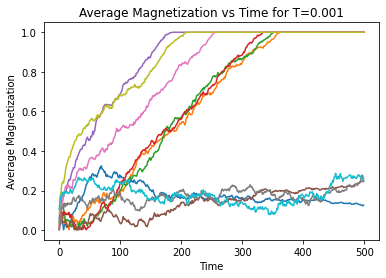

In [ ]:
t = np.arange(0,500,1)
fig,ax=plt.subplots(1,1)
for i in range(10):
  plt.plot(t,instanceMag[i])  
ax.set(xlabel='Time',ylabel='Average Magnetization', title='Average Magnetization vs Time for T=0.001')
plt.show()

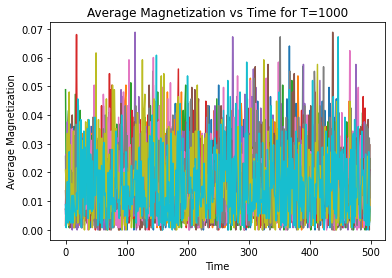

In [ ]:
t = np.arange(0,500,1)
fig,ax=plt.subplots(1,1)
for i in range(10):
  plt.plot(t,instanceMag1000[i])  
ax.set(xlabel='Time',ylabel='Average Magnetization', title='Average Magnetization vs Time for T=1000')
plt.show()

In [ ]:
def AvAndSTD(arr):
  finalVal=np.zeros(arr.shape[0])

  finalVal[:]=arr[:,arr.shape[1]-1]

  AbsArray=np.abs(finalVal)

  stDev=np.std(AbsArray)

  Av=np.mean(AbsArray)

  return Av, stDev

In [ ]:
Av0001, stDev0001= AvAndSTD(instanceMag)
Av1000, stDev1000= AvAndSTD(instanceMag1000)



In [ ]:
print('Average for T=0.001: ' + str(Av0001))
print('Standard Deviation for T=0.001: ' + str(stDev0001))

print('Average for T=1000: ' + str(Av1000))
print('Standard Deviation for T=1000: ' + str(stDev1000))

Average for T=0.001: 0.687839999999974
Standard Deviation for T=0.001: 0.38387161187040447
Average for T=1000: 0.014000000000000007
Standard Deviation for T=1000: 0.008677326777297262


There appears to be significant variation in the degree of magnetization with respect to time for each of the low temperature ising instances. At the final time step, the standard deviation is 0.7. This implies that the final condition of the model is likely highly sensitive to the initial conditions and random variation. Some instances appeared to reach complete magnetization, while others were not able to completely magnetize by the final time step. 


There does not seem to be a large degree of variation between each model for the high temperature ising instances. In all cases, there is no clear positive or negative trend with respect to time and all models appear to oscillate chaotically around ~0.01 with a final standard deviation of 0.008.

**(d) Write a function that will iterate your code in part (c) for multiple temperatures. Your code should keep track of and return the averages and standard deviations that you calculated in part(c) for each temperature. Run this code for the parameters above, iterating through the following temperatures: T = [1,2,2.75,3,3.25,4,5]. Plot the averages and standard deviations as a function of temperature. How does the average magnetization and the standard deviation vary with temperature? Explain why you think this is.**

In [ ]:
temps=np.array([1,2,2.75,3,3.25,4,5])

In [ ]:
def TempAvSTD(n,N,J,temps,h,t):
  Averages=np.zeros(np.size(temps))
  StandardDeviations=np.zeros(np.size(temps))
  i=0
  for T in temps:
    print('Now calculating T = ' + str(T) + ' instances.')
    instances=isingInstance(n,N,J,T,h,t)
    Average,StandardDeviation=AvAndSTD(instances)
    Averages[i]=Average
    StandardDeviations[i]=StandardDeviation
    print('T = ' + str(T) + ' instances complete.')
    i+=1
  return Averages, StandardDeviations






In [ ]:
Averages,StandardDeviations=TempAvSTD(10,50,1,temps,0,500)

Now calculating T = 1.0 instances.
Currently running instance 1 of 10
Instance complete
Currently running instance 2 of 10
Instance complete
Currently running instance 3 of 10
Instance complete
Currently running instance 4 of 10
Instance complete
Currently running instance 5 of 10
Instance complete
Currently running instance 6 of 10
Instance complete
Currently running instance 7 of 10
Instance complete
Currently running instance 8 of 10
Instance complete
Currently running instance 9 of 10
Instance complete
Currently running instance 10 of 10
Instance complete
T = 1.0 instances complete.
Now calculating T = 2.0 instances.
Currently running instance 1 of 10
Instance complete
Currently running instance 2 of 10
Instance complete
Currently running instance 3 of 10
Instance complete
Currently running instance 4 of 10
Instance complete
Currently running instance 5 of 10
Instance complete
Currently running instance 6 of 10
Instance complete
Currently running instance 7 of 10
Instance complete


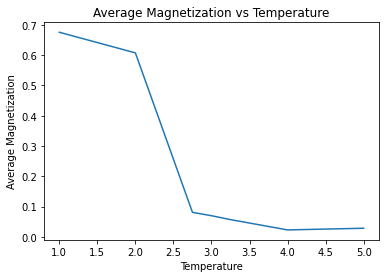

In [ ]:

fig,ax=plt.subplots(1,1)
plt.plot(temps,Averages)  
ax.set(xlabel='Temperature',ylabel='Average Magnetization', title='Average Magnetization vs Temperature')
plt.show()

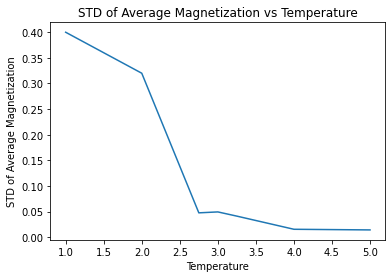

In [ ]:
fig,ax=plt.subplots(1,1)
plt.plot(temps,StandardDeviations)  
ax.set(xlabel='Temperature',ylabel='STD of Average Magnetization', title='STD of Average Magnetization vs Temperature')
plt.show()

As temperature increases, average magnetization decreases. The probability of a node randomly flipping spin increases with temperature so local groups of magnetic allignments will quickly randomize. The critical temperature for this balance between local allignment and random magnetization appears to occur at approximately T=2.25. 

**(e) Make an animation for a temperature near the large change in behavior (use your plots above to guide your choice). How does this differ from the other videos you made? Given your observations, do you expect system size to affect the behavior of the system? If so, why and how?**

In [ ]:
mat3, avMag3 = Ising2DOptimized(50,1,2.25,0,500)


In [ ]:
vf0 = mat3[:,:,499]

In [ ]:
print(vf0.shape)

(50, 50)


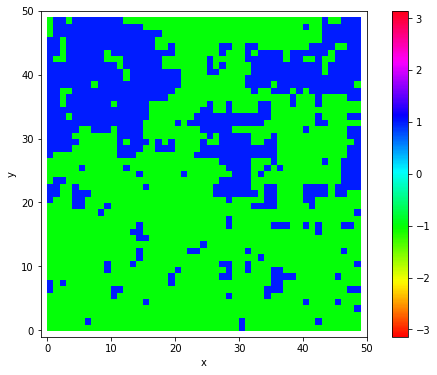

In [ ]:
# visualize by looking at angles
t=500
vf0 = mat3[:,:,t-1]
fig,ax = plt.subplots(figsize=(9,6))
ang = ax.pcolormesh(x,y,vf0,cmap='hsv',vmin=-np.pi,vmax=np.pi)
ax.axis('square')

ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')

plt.colorbar(ang) # if the figure is named, that needs to be the input here 
plt.show()

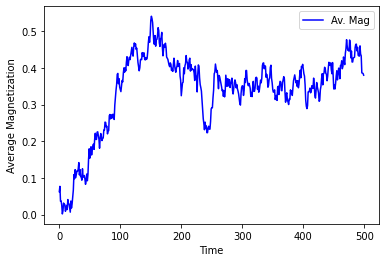

In [ ]:
t=500
t=np.arange(0,t,1)
fig,ax=plt.subplots(1,1)
plt.plot(t,avMag3,color='blue',label='Av. Mag')
ax.set(xlabel='Time',ylabel='Average Magnetization')
ax.legend()
plt.show()

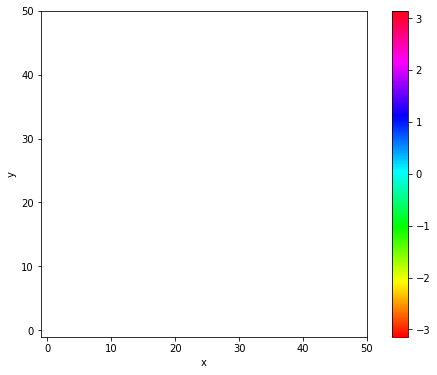

In [ ]:
# animation of angles

fig,ax = plt.subplots(figsize=(9,6))
ax.axis('square') # this needs to come before ax.set, otherwise this will change axes from set limits
ax.set(xlim=(-1,N),ylim=(-1,N),xlabel='x',ylabel='y')

ims = []
for i in range(0,500,5):
  angs = mat3[:,:,i]
  im = ax.pcolormesh(x,y,angs,cmap='hsv',vmin=-np.pi,vmax=np.pi,animated=True)
  if i == 0:
    plt.colorbar(ang)
  ims.append([im])

ang_anim = animation.ArtistAnimation(fig,ims,interval=50,repeat_delay=1000) 
HTML(ang_anim.to_jshtml())

At T=2.25, the system appears to barely form magnetic domains. The boundaries of each region are unstable and move across the system. At the final time step, we were not able to completely magnetize the system. However, given additional time steps its possible that the (-1) spin could become dominant. 

Each magnetic domain appears to grow from small to large, so the time required for the system to reach maximum magnetization appears to scale proportional to the size of the system. 